In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
PL_data = pd.read_csv('PL_test.csv')

#renaming column
PL_data.rename(columns = {'Entertainment Rating': 'ER'},inplace =True)
PL_data.columns

Index(['Date', 'Time', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR', 'HS',
       'AS', 'HST', 'AST', 'HF', 'AF', 'HC', 'AC', 'HY', 'AY', 'HR', 'AR',
       'ER'],
      dtype='object')

In [4]:
#drops missing values if there exist any 
PL_data = PL_data.dropna(axis=0)

#previewing data 
PL_data.head()

,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR,ER
0,12/09/2020,12:30,Fulham,Arsenal,0,3,A,5,13,2,6,12,12,2,3,2,2,0,0,5.2
1,12/09/2020,15:00,Crystal Palace,Southampton,1,0,H,5,9,3,5,14,11,7,3,2,1,0,0,3.0
2,12/09/2020,17:30,Liverpool,Leeds,4,3,H,22,6,6,3,9,6,9,0,1,0,0,0,9.1
3,12/09/2020,20:00,West Ham,Newcastle,0,2,A,15,15,3,2,13,7,8,7,2,2,0,0,5.3
4,13/09/2020,14:00,West Brom,Leicester,0,3,A,7,13,1,7,12,9,2,5,1,1,0,0,4.9


In [41]:

#Creating a column for home and away team forms 

#lets create a list containing all the team names
teams = []
for i in PL_data.HomeTeam:
    teams.append(i)

#removing duplicates 
teams = list(set(teams))  

print(teams)

#Step1: now iterate throw every row of the dataset and collect HT and AT names



#Home team column
home_team_matches = []
for team in PL_data.HomeTeam:
    home_team_matches.append(team)

print(home_team_matches)

#away team column
away_team_matches = []
for team in PL_data.HomeTeam:
    away_team_matches.append(team)

print(away_team_matches)
    

#Step2: Collect last three fixtures of each team (if applicable)
num = 0

#creating a dictionary containing team name and their indexes of first three home matches within the dataset

first_three_home_games = {}
index_match = []

for team in teams:
    for j in range(len(home_team_matches)):
        if(home_team_matches[j] == team):
            if(num<3):
                index_match.append(j)
                num = num +1
            first_three_home_games[str(home_team_matches[j])] = index_match
    num = 0
    index_match = []

print(first_three_home_games)

 

#Step3: Refer to FTR column to know if the team won,lost or drew the fixtures

print(PL_data.FTR[1])

# pretty way to look at dictionary key and value pairs 
for key in first_three_home_games:
    print(key, '->', first_three_home_games[key])
    
home_results = {}
home_results_list = []
for key in first_three_home_games:
    for index in first_three_home_games[key]:
        home_results_list.append(PL_data.FTR[index])
    home_results[str(key)] = home_results_list
    home_results_list = []
        

#home_results is a dictionary containing team names as key and their corresponding values as 
print(home_results)     

#Step4: Create an algorithm to assign form points 
form_at_home = {}
form = 0

# since there is no set algorithm defined for a teams form
# we will be creating out own algorithm 
# We look at their first three games and if their win then a team gets 2 points, 1 point for draw and -1 for loss
# A max a team could get is 6 (WWW)

for key in home_results:
    for index in home_results[key]:
        if(index == 'A'):
            form = form - 1 
        elif(index == 'H'):
            form = form + 2 
        else:
            form = form + 1
    
    form_at_home[key] = form
    form = 0

# A dictionary containing team name and their current form 
print(form_at_home)


#Step5: Add a new column "CurrentForm" containing the results 

#storing the form value in a list 
results = []
for team in home_team_matches:
    results.append(form_at_home[team])

print(results)
    

PL_data["HomeTeamForm"] = results


PL_data.head()

['Brighton', 'Wolves', 'Chelsea', 'Leeds', 'Newcastle', 'Sheffield United', 'Crystal Palace', 'Burnley', 'West Brom', 'Arsenal', 'Man United', 'Man City', 'Liverpool', 'Tottenham', 'Leicester', 'West Ham', 'Everton', 'Fulham', 'Aston Villa', 'Southampton']
['Fulham', 'Crystal Palace', 'Liverpool', 'West Ham', 'West Brom', 'Tottenham', 'Brighton', 'Sheffield United', 'Everton', 'Leeds', 'Man United', 'Arsenal', 'Southampton', 'Newcastle', 'Chelsea', 'Leicester', 'Aston Villa', 'Wolves', 'Brighton', 'Crystal Palace', 'West Brom', 'Burnley', 'Sheffield United', 'Tottenham', 'Man City', 'West Ham', 'Fulham', 'Liverpool', 'Chelsea', 'Everton', 'Leeds', 'Newcastle', 'Leicester', 'Southampton', 'Arsenal', 'Wolves', 'Man United', 'Aston Villa', 'Everton', 'Chelsea', 'Man City', 'Newcastle', 'Sheffield United', 'Crystal Palace', 'Tottenham', 'Leicester', 'West Brom', 'Leeds', 'Aston Villa', 'West Ham', 'Fulham', 'Man United', 'Liverpool', 'Southampton', 'Wolves', 'Arsenal', 'Brighton', 'Burnley

,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HS,AS,HST,...,HF,AF,HC,AC,HY,AY,HR,AR,ER,HomeTeamForm
0,12/09/2020,12:30,Fulham,Arsenal,0,3,A,5,13,2,...,12,12,2,3,2,2,0,0,5.2,-3
1,12/09/2020,15:00,Crystal Palace,Southampton,1,0,H,5,9,3,...,14,11,7,3,2,1,0,0,3.0,2
2,12/09/2020,17:30,Liverpool,Leeds,4,3,H,22,6,6,...,9,6,9,0,1,0,0,0,9.1,6
3,12/09/2020,20:00,West Ham,Newcastle,0,2,A,15,15,3,...,13,7,8,7,2,2,0,0,5.3,2
4,13/09/2020,14:00,West Brom,Leicester,0,3,A,7,13,1,...,12,9,2,5,1,1,0,0,4.9,1


Total number of match: 137
Possible features: 19
Matches won by home team: 51
Matches won by away team: 56
matches that were drawn: 30
Home team win rate: 37.22627737226277
Away team win rate: 40.87591240875913
Draw rate: 21.897810218978105


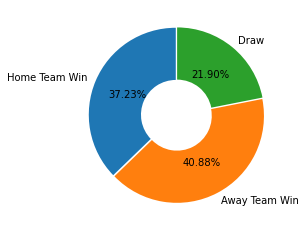

In [6]:
#Let's explore this data to collect some insights 

#total number of matches 
num_matches = PL_data.shape[0]

#total columns(possible features)
#-1 because "Entertainment Raiting" is a taget column we trying to predict, thus it can not be a feature
possible_features = PL_data.shape[1]-1

#matches won by home team 
num_home_wins = len(PL_data[PL_data.FTR == 'H'])

#macthes won by away team
num_away_wins = len(PL_data[PL_data.FTR == 'A'])

#matches that ended as a draw 
num_draws = len(PL_data[PL_data.FTR == 'D'])

#results
x = [num_home_wins, num_away_wins, num_draws]

#defining labels
labels = ["Home Team Win", "Away Team Win", "Draw"]

#defining the decimal points 
explode=[0.01,0.01,0.01]



#let's calculate win rate for the home team 
win_rate_home = (float(num_home_wins)/num_matches)*100

#win rate for away team
win_rate_away = (float(num_away_wins)/num_matches)*100

#draw rate 
draw_rate = (float(num_draws)/num_matches)*100





print ("Total number of match: {}".format(num_matches))
print ("Possible features: {}".format(possible_features))
print ("Matches won by home team: {}".format(num_home_wins))
print ("Matches won by away team: {}".format(num_away_wins))
print ("matches that were drawn: {}".format(num_draws))
print ("Home team win rate: {}".format(win_rate_home))
print ("Away team win rate: {}".format(win_rate_away))
print ("Draw rate: {}".format(draw_rate))


#Let's make a pie graph to represent this data
plt.pie(x=x, labels=labels,explode=explode, startangle=90,
        autopct='%1.2f%%',wedgeprops={"width":0.6})

#display the graph
plt.show()

#By looking at the pie graph, it is clear that due to no fans in the statdium, home team advantage do not exist
#Both home and away team have equal chances of winning a game 

array([[<AxesSubplot:xlabel='FTHG', ylabel='FTHG'>,
        <AxesSubplot:xlabel='FTAG', ylabel='FTHG'>,
        <AxesSubplot:xlabel='HS', ylabel='FTHG'>,
        <AxesSubplot:xlabel='AS', ylabel='FTHG'>,
        <AxesSubplot:xlabel='HST', ylabel='FTHG'>,
        <AxesSubplot:xlabel='AST', ylabel='FTHG'>,
        <AxesSubplot:xlabel='HF', ylabel='FTHG'>,
        <AxesSubplot:xlabel='AF', ylabel='FTHG'>,
        <AxesSubplot:xlabel='HC', ylabel='FTHG'>,
        <AxesSubplot:xlabel='AC', ylabel='FTHG'>,
        <AxesSubplot:xlabel='HY', ylabel='FTHG'>,
        <AxesSubplot:xlabel='AY', ylabel='FTHG'>,
        <AxesSubplot:xlabel='HR', ylabel='FTHG'>,
        <AxesSubplot:xlabel='AR', ylabel='FTHG'>,
        <AxesSubplot:xlabel='ER', ylabel='FTHG'>],
       [<AxesSubplot:xlabel='FTHG', ylabel='FTAG'>,
        <AxesSubplot:xlabel='FTAG', ylabel='FTAG'>,
        <AxesSubplot:xlabel='HS', ylabel='FTAG'>,
        <AxesSubplot:xlabel='AS', ylabel='FTAG'>,
        <AxesSubplot:xlabel='HST', ylab

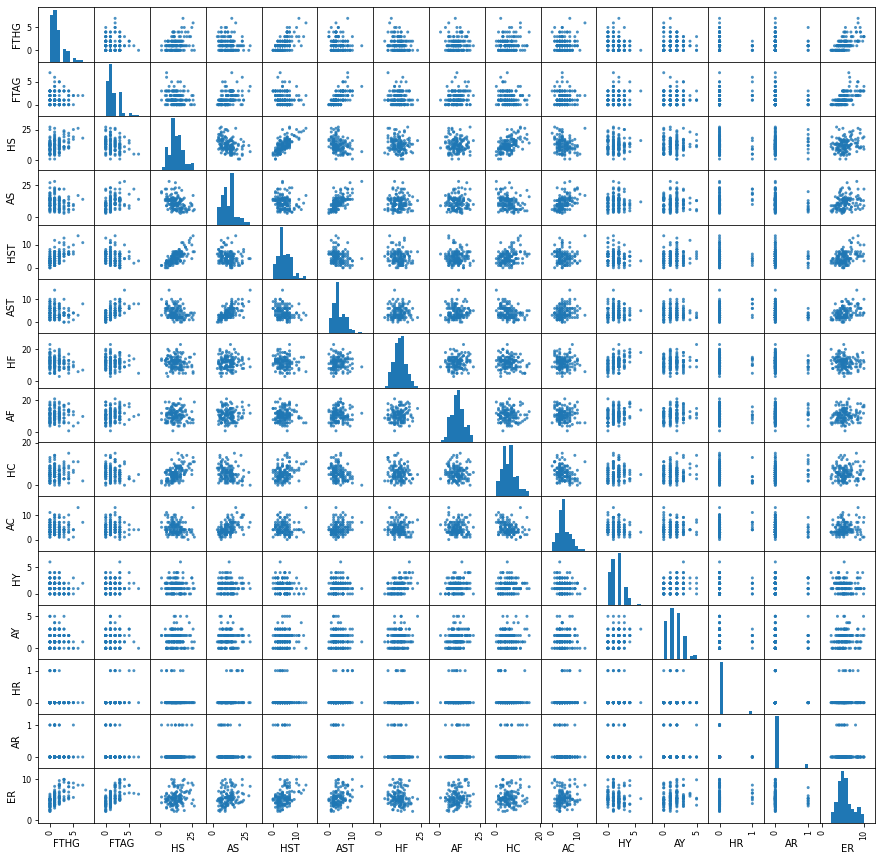

In [7]:
# Visualising distribution of data
from pandas.plotting import scatter_matrix

#the scatter matrix is plotting each of the columns specified against each other column.
#Scatter plots show how much one variable is affected by another. 
#The relationship between two variables is called their correlation
#negative vs positive correlation

scatter_matrix(PL_data[['FTHG', 'FTAG', 'FTR', 'HS',
                        'AS','HST', 'AST', 'HF', 'AF', 'HC', 'AC', 'HY', 'AY', 'HR', 'AR', 'ER']], figsize = (15,15), alpha = 0.8, range_padding=0.7)

#using the scatter plot, some correlations are very evident 
# There is a positive correlation between HS and HST (AS and AST)
# Positive correlation exist between HS and HC -> more shots you take, more likely the team is going to get a corner
# Positive correlation between AY and AF -> more yellow cards meaning more fouls committed by the team 

#Overall, this data is making sense which means that our prediction would be reasonable and not vague


In [8]:
# Trying Xg boost machine learning model for prediction 
from sklearn.model_selection import train_test_split

model_features = ['FTHG', 'FTAG', 'FTR', 'HS',
                        'AS','HST', 'AST', 'HF', 'AF', 'HC', 'AC', 'HY', 'AY', 'HR', 'AR']
#input columns
X = PL_data[model_features]

#target column
y = PL_data.ER

# Separate data into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X,y)


In [9]:
from xgboost import XGBRegressor

my_model = XGBRegressor()
my_model.fit(X_train, y_train)

ModuleNotFoundError: No module named 'xgboost'

In [ ]:
from sklearn.metrics import mean_absolute_error

predictions = my_model.predict(X_valid)
print("Mean Absolute Error: " + str(mean_absolute_error(predictions, y_valid)))